In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

#Function to create columns in DF
def df_construct(fare = 50, rate=-2, year_beg = 2020, year_end = 2061, time_interval = 10):
  df = pd.DataFrame(columns = columns)
  df.iloc[:, 0] = np.arange(year_beg, year_end, time_interval)
  df.iloc[:, 1] = df.iloc[:, 0] - year_beg
  df.iloc[0, 2] = fare*12
  df.iloc[1:, 2] = fare*12*df.iloc[1:, 1]
  df.iloc[0, 3] = df.iloc[0, 2]
  df.iloc[1:,3] = df.iloc[1:,2] * (pow(1+rate/100, df.iloc[1:, 1]))
  return df

In [3]:
# 50000$ nonref
year_beg = 2020
year_end = 2061
time_interval = 1
rate = -2
fare = 84
columns = ['year', 'years_passed','total_nonref', 'CI_incl_nonref']

ins_nonref = df_construct(fare, rate)

ins_nonref.tail()

,year,years_passed,total_nonref,CI_incl_nonref
0,2020,0,1008,1008
1,2030,10,10080,8236.09
2,2040,20,20160,13459
3,2050,30,30240,16495.4
4,2060,40,40320,17970.6


In [4]:
# 50000$ ref
fare = 139
columns = ['year', 'years_passed','total_ref', 'CI_incl_ref']

ins_ref = df_construct(fare)
ins_ref = ins_ref[['total_ref', 'CI_incl_ref']]
ins_ref.tail(3)

,total_ref,CI_incl_ref
2,33360,22271.4
3,50040,27296
4,66720,29737.1


In [5]:
#Concatenate both DF for analysis

ins_sum = pd.concat([ins_nonref, ins_ref], axis=1)
ins_sum.head(2)

,year,years_passed,total_nonref,CI_incl_nonref,total_ref,CI_incl_ref
0,2020,0,1008,1008,1668,1668
1,2030,10,10080,8236.09,16680,13628.8


In [6]:
#calculate investment profit for difference between 2 fares

investment_rate = 1+3/100          #about 3% in CELI in 2020

ins_sum['total_dif'] = ins_sum['total_ref']-ins_sum['total_nonref']
ins_sum['investment_3pct'] = ins_sum['total_dif'] * (pow(investment_rate, ins_sum['years_passed']))

#show without decimals
pd.set_option('precision', 0)
ins_sum.to_csv('Investment_concatenated.csv')

ins_sum[ins_sum.year == 2060]

,year,years_passed,total_nonref,CI_incl_nonref,total_ref,CI_incl_ref,total_dif,investment_3pct
4,2060,40,40320,2e+04,66720,3e+04,26400,86118


In [7]:
ins = pd.read_csv('Investment_concatenated.csv')
ins.drop('Unnamed: 0', axis=1, inplace=True)
ins.head()

,year,years_passed,total_nonref,CI_incl_nonref,total_ref,CI_incl_ref,total_dif,investment_3pct
0,2020,0,1008,1008,1668,1668,660,660
1,2030,10,10080,8236,16680,13629,6600,8870
2,2040,20,20160,13459,33360,22271,13200,23841
3,2050,30,30240,16495,50040,27296,19800,48060
4,2060,40,40320,17971,66720,29737,26400,86118


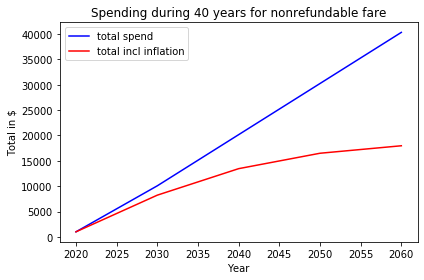

In [8]:
plt.plot(ins.year, ins.total_nonref, color = 'blue', label = 'total spend')
plt.plot(ins.year, ins.CI_incl_nonref, color='red', label = 'total incl inflation')

plt.xlabel('Year')
plt.ylabel('Total in $')
plt.title('Spending during 40 years for nonrefundable fare')
plt.legend(loc='upper left')

plt.style.use('ggplot')
plt.tight_layout()
plt.show()

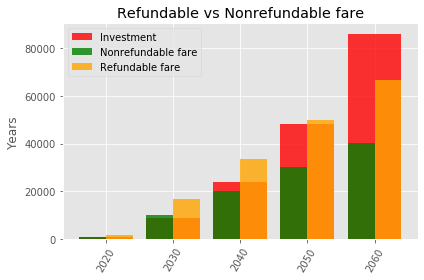

In [9]:
width = 4 # the width of the bars
fig, ax = plt.subplots()

inv = ax.bar(ins.year, ins.investment_3pct, width*2, label='Investment', color = 'red', alpha = 0.8)
nonref = ax.bar(ins.year - width/2, ins.total_nonref, width, label='Nonrefundable fare', color='green', alpha = 0.8)
ref = ax.bar(ins.year + width/2, ins.total_ref, width, label='Refundable fare', color='orange', alpha = 0.8)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Years')
ax.set_title('Refundable vs Nonrefundable fare')
ax.set_xticks(ins.year)

plt.xticks([2020, 2030, 2040, 2050, 2060], rotation = 60)
# ax.set_xticklabels(labels)
ax.legend(loc='upper left')


fig.tight_layout()
plt.show()

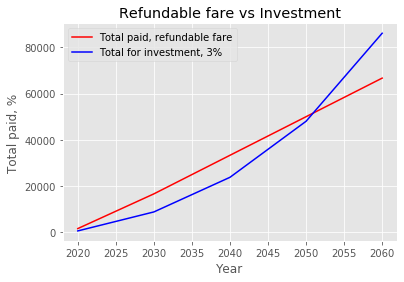

In [10]:
plt.plot(ins.year, ins.total_ref,color='red', label = 'Total paid, refundable fare')
plt.plot(ins.year, ins.investment_3pct, color='blue', label = 'Total for investment, 3%')

plt.xlabel('Year')
plt.ylabel('Total paid, %')
plt.title('Refundable fare vs Investment')

plt.legend(loc = 'upper left')
plt.show()

# plt.savefig("two_straight_lines_intersection_point_01.png", bbox_inches='tight')

In [11]:
#  plt.annotate('setosa', xy=(5.0, 3.5), xytext=(4.25, 4.0), arrowprops={'color':'red'}) 
total = ins.total_nonref[ins.year == 2046]
CI = ins.CI_incl_nonref[ins.year == 2046]
invest = ins.investment_3pct[ins.year == 2046]

print('dif1:', (total - CI), 'dif2:', (invest - total))

dif1: Series([], dtype: float64) dif2: Series([], dtype: float64)


In [12]:
paid_off = ins[(ins.investment_3pct.round(-4) == ins.total_ref.round(-4)) & (ins.year != 2020)]
paid_off

,year,years_passed,total_nonref,CI_incl_nonref,total_ref,CI_incl_ref,total_dif,investment_3pct
3,2050,30,30240,16495,50040,27296,19800,4806
